In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error  
from warnings import filterwarnings
from joblib import dump, load
filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['Total Spend'] = df['TV']  + df['Newspaper'] + df['Radio']
df.head()

,TV,Radio,Newspaper,Sales,Total Spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Total Spend', ylabel='Sales'>

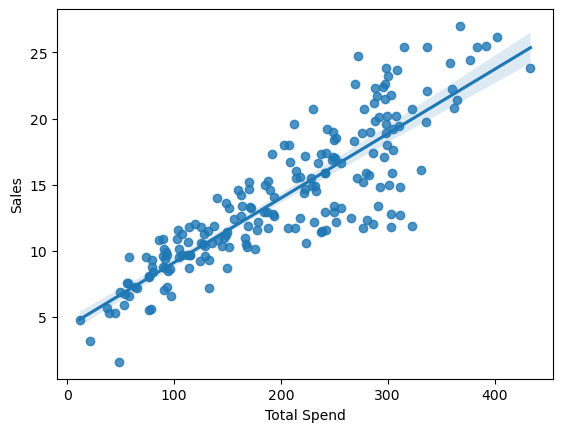

In [5]:
sns.regplot(df, x = 'Total Spend', y = 'Sales')

In [6]:
X = df['Total Spend']
y = df['Sales']

In [7]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [8]:
potential_spend = np.linspace(0, 500, 100)

In [9]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

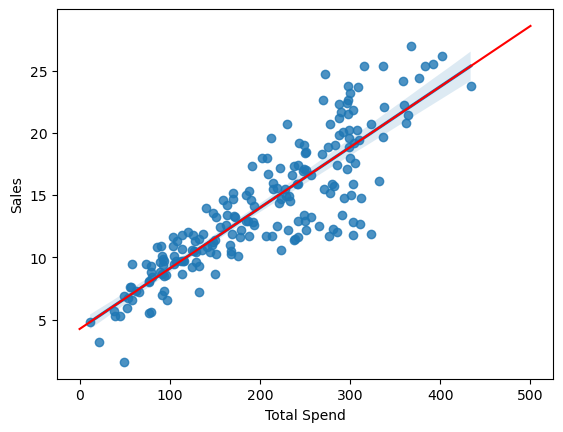

In [10]:
sns.regplot(x='Total Spend', y = 'Sales', data = df, )
plt.plot(potential_spend, predicted_sales, color = 'red')

In [11]:
pr_sales = 0.04868788 * 200 + 4.24302822
pr_sales

13.98060422

In [12]:
pot_spend = np.linspace(0, 500, 200)

In [13]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

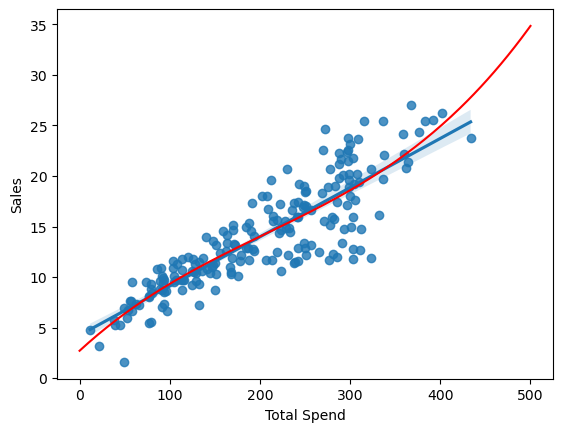

In [14]:
pred_sales = 3.07615033e-07 * pot_spend**3 - 1.89392449e-04* pot_spend**2 + 8.20886302e-02*pot_spend**1 + 2.70495053e+00
sns.regplot(x='Total Spend', y = 'Sales', data = df, )
plt.plot(pot_spend, pred_sales, color = 'red')

# seems like increasing B coeffecients makes better lines

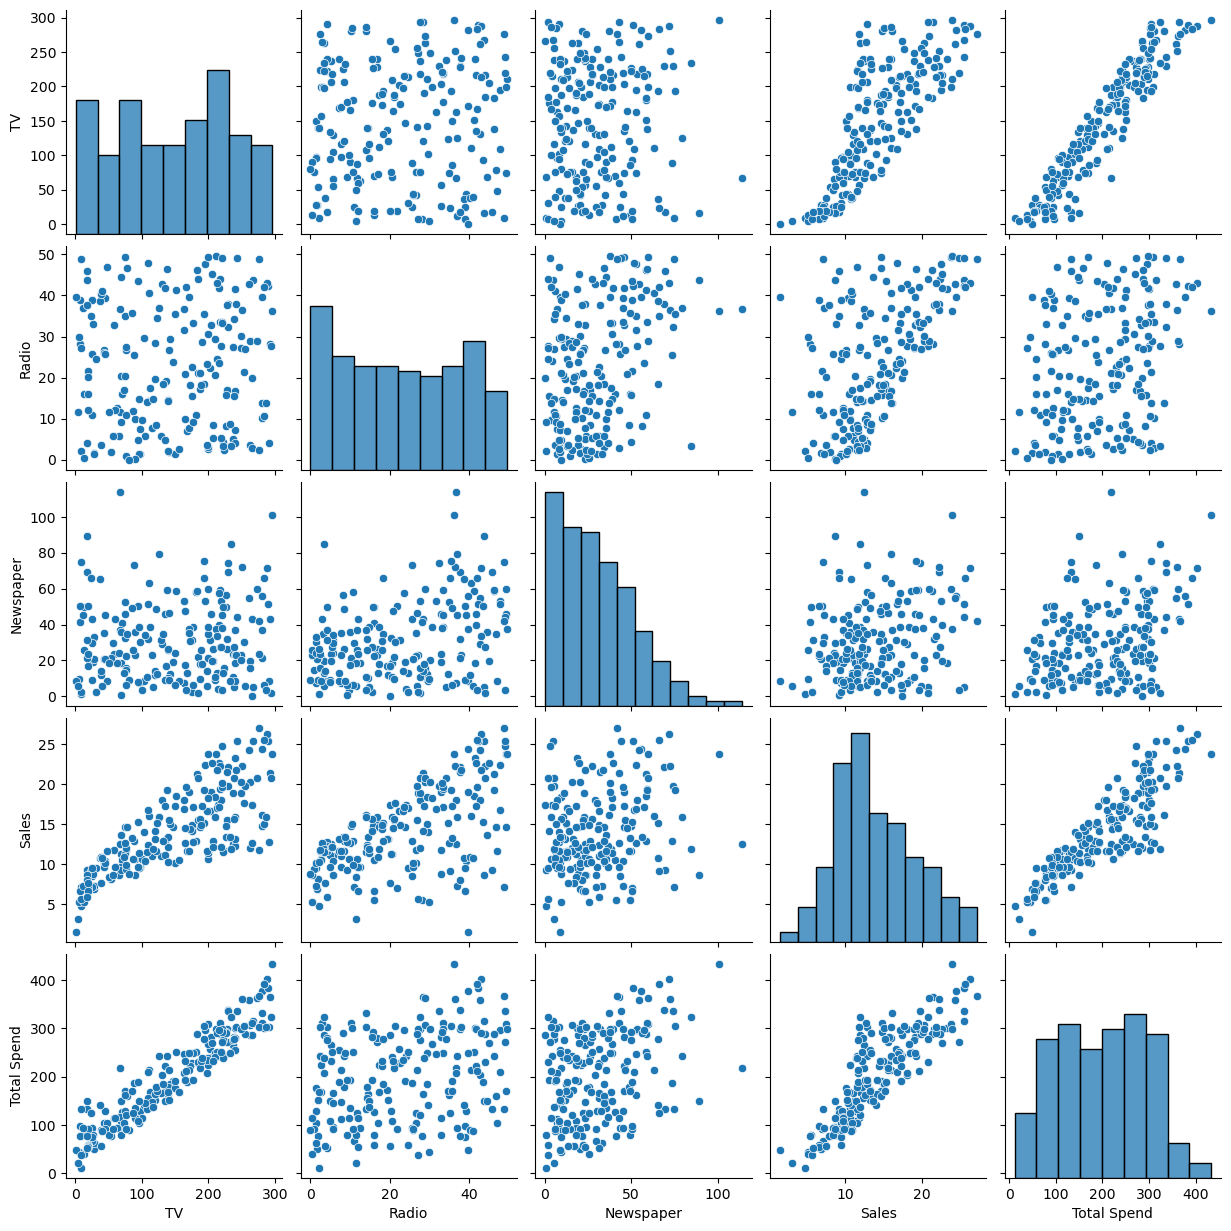

In [15]:
 sns.pairplot(df)

In [16]:
X = df.drop(["Sales", "Total Spend"],  axis=1)
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [17]:
y = df['Sales']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
test_predictions = model.predict(X_test)

In [22]:
df['Sales'].mean()

14.0225

<Axes: xlabel='Sales', ylabel='Count'>

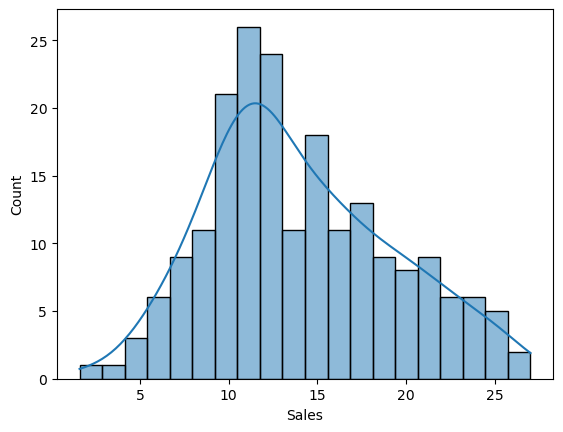

In [23]:
sns.histplot(data=df, x='Sales', bins=20, kde=True)

In [24]:
#MAE
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [25]:
#RMSE
(mean_squared_error(y_test, test_predictions))**0.5

1.5161519375993884

In [26]:
test_residuals = y_test - test_predictions

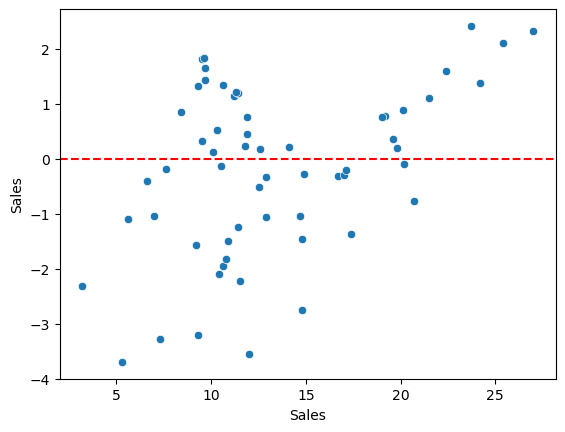

In [27]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y = 0, color='r', ls = 'dashed')

# if see a pattern, then the dataset is not valid for linear regression

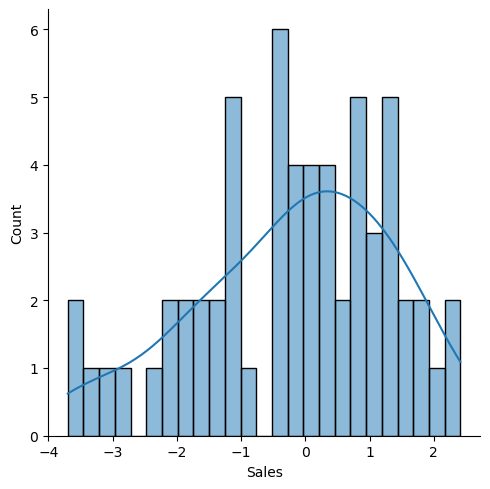

In [28]:
sns.displot(test_residuals, bins=25, kde=True)

In [29]:
import scipy.stats as stats

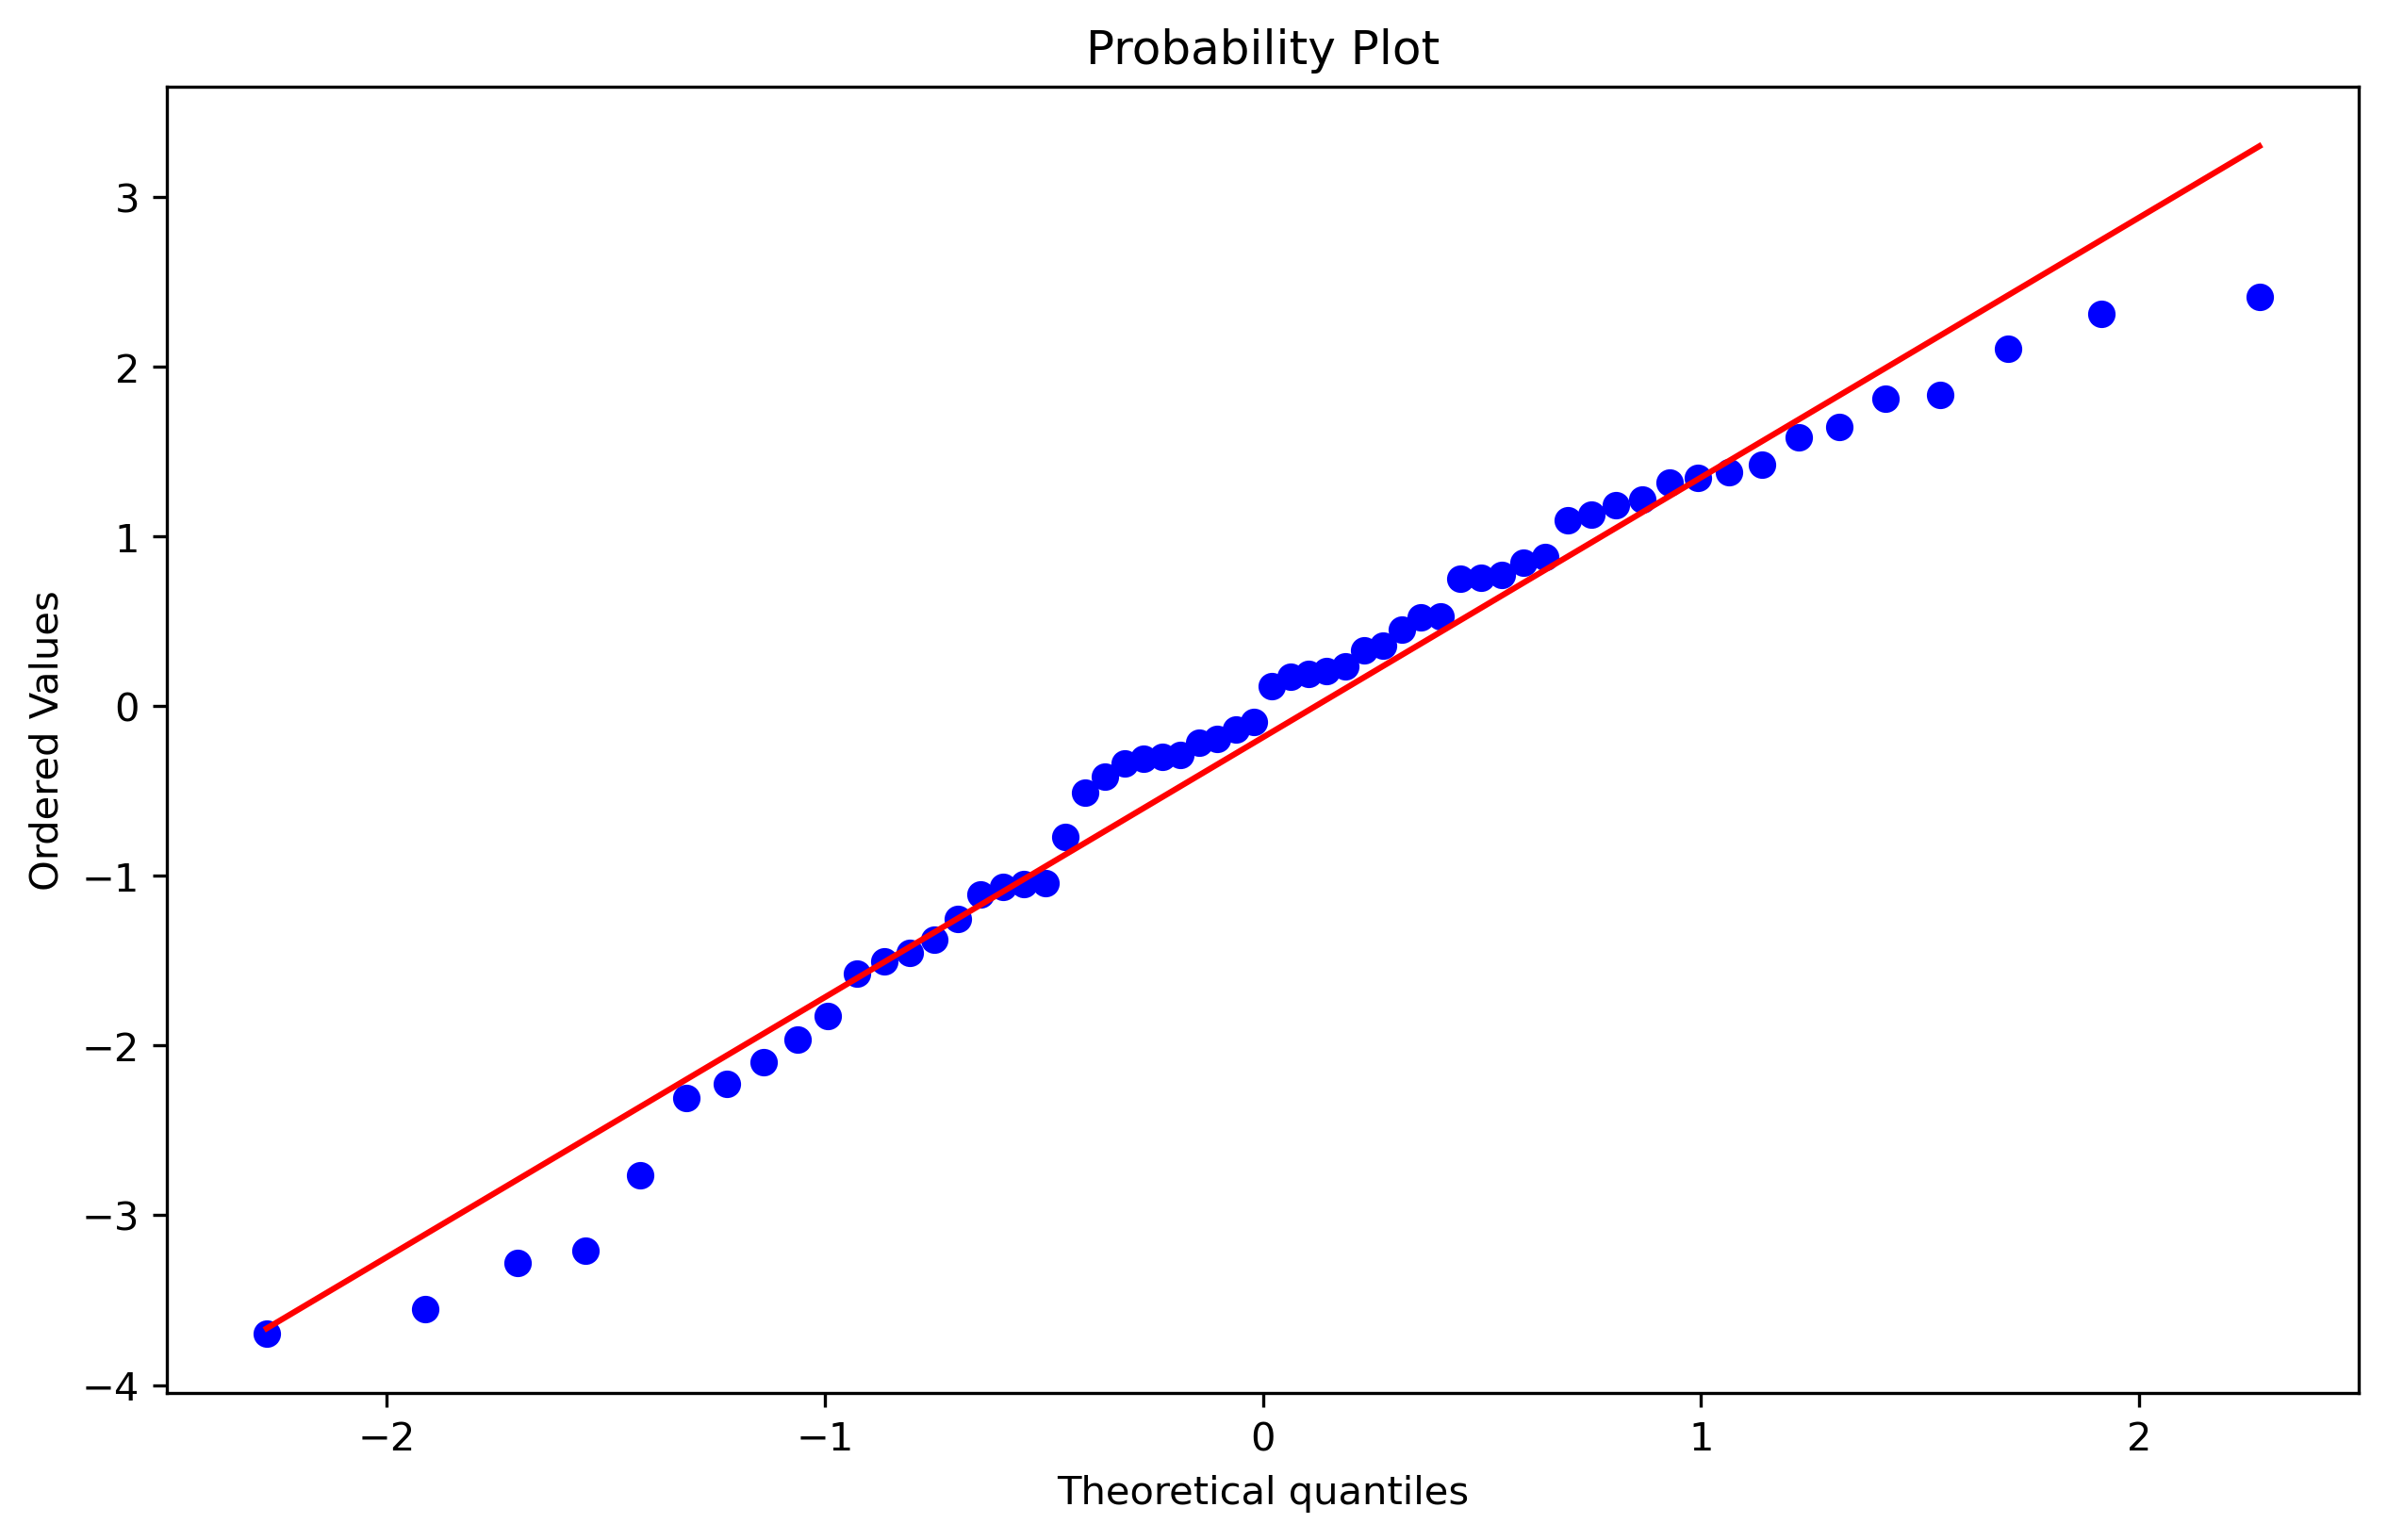

In [30]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
_ = stats.probplot(test_residuals, plot=ax)

# compares data quantiles to theoratical(how it was supposedd to be)
# the closer the blue dots to the red line, the better the data is for linear regession

In [31]:
final_model = LinearRegression()

In [32]:
final_model.fit(X,y)

LinearRegression()

In [33]:
final_model.coef_

# ass beta for last factor is almost zero, it is negligible and we cant drop it

array([ 0.04576465,  0.18853002, -0.00103749])

## to get better understanding of whether the model is a fit for linear regression, try plotting predicted vs actual for each factor

In [35]:
y_hat = final_model.predict(X)

In [36]:
# plot for each factors against y_hat
# the unit must be same

In [37]:
# to save the model
dump(final_model, "final_sales_model.joblib")

['final_sales_model.joblib']

In [38]:
# to load the saved model
loaded_model = load("final_sales_model.joblib")

In [39]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
# to check the shape of my model
print(X.shape)

# to predict a new data
check_data = [[120, 23, 21]]
final_model.predict(check_data)

(200, 3)


array([12.74504986])

In [41]:
df = pd.read_csv("Advertising.csv")
df = df.drop("Unnamed: 0", axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [42]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
# polynomial_converted = PolynomialFeatures(degree=2, include_bias=False)

In [45]:
# polynomial_converted.fit(X)

In [46]:
# poly_features = polynomial_converted.transform(X)

# need to fit and return and can use it in one line
# poly_features = polynomial_converted.fit_transform(X)

In [47]:
# X.shape

In [48]:
# poly_features.shape

In [49]:
# poly_features[0]

# # x1,x2,x3, x1x2, x1x3, x2x3, x3x1, x1*x1, x2*x2, x3*x3

In [50]:
# X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [51]:
# model = LinearRegression()

In [52]:
# model.fit(X_train, y_train)

In [55]:
test_preds = model.predict(X_test)
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [57]:
MAE = mean_absolute_error(y_test, test_preds)

In [59]:
MSE =mean_squared_error(y_test, test_preds)

In [61]:
RMSE = np.sqrt(MSE)

In [63]:
print(MAE, MSE, RMSE)

1.213745773614481 2.2987166978863796 1.5161519375993884


In [65]:
# train_rmse = []
# test_rmse = []

# for i in range(1, 10):
#     poly_conv = PolynomialFeatures(degree=i, include_bias=False)
#     poly_feat = poly_conv.fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)
    
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     train_preds = model.predict(X_train)
#     test_preds = model.predict(X_test)
    
#     rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
#     rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
    
    
#     train_rmse.append(rmse_train)
#     test_rmse.append(rmse_test)
    


# test_rmse

In [67]:
# plt.plot(range(1,6), train_rmse[:5], label="TRAIN RMSE")
# plt.xlabel("Degree of Poly")
# plt.ylabel("RMSE")
# plt.legend()

# plt.plot(range(1,6), test_rmse[:5], label="TEST RMSE")
# plt.xlabel("Degree of Poly")
# plt.ylabel("RMSE")
# plt.legend()

In [69]:
final_poly_conv = PolynomialFeatures(degree=3, include_bias=False)
final_poly_fit = final_poly_conv.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(final_poly_fit, y, test_size=0.3, random_state=101)

final_model1 = LinearRegression()
final_model1.fit(final_poly_fit, y)

# to export model
dump(final_model1, "Final Model1.joblib")
dump(final_poly_conv, "Final converter1.joblib")

['Final converter1.joblib']

In [72]:
lc = load("Final converter1.joblib")
lm = load("Final Model1.joblib")

campaign = [[149, 22, 12]]
td = lc.fit_transform(campaign)
lm.predict(td)

array([14.64501014])

In [82]:
df = pd.read_csv("Advertising.csv")